In [11]:
import json
import pickle
from gensim.models import LdaModel
from gensim.corpora import Dictionary

from scipy.sparse import coo_matrix, csr_matrix, lil_matrix, csc_matrix, diags, vstack
from scipy.stats import chi2_contingency, spearmanr, norm

from matplotlib import pyplot as plt
from IPython.display import HTML, display
import pandas as pd
import numpy as np
import random
from datetime import date
from matplotlib.dates import DateFormatter
import matplotlib.patches as mpatches

In [2]:
politics_dictionary = Dictionary.load("stored_variables/politics_dictionary_lda")

In [3]:
users_by_month = []

for i in range(24):
    with open("stored_variables/politics_auths2_month" + str(i) + ".json", 'r') as f:
        users_by_month.append(json.load(f))

In [4]:
months = [date(2015, i, 1) for i in range(1,13)] + [date(2016, i, 1) for i in range(1,13)]

/usr/local/anaconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


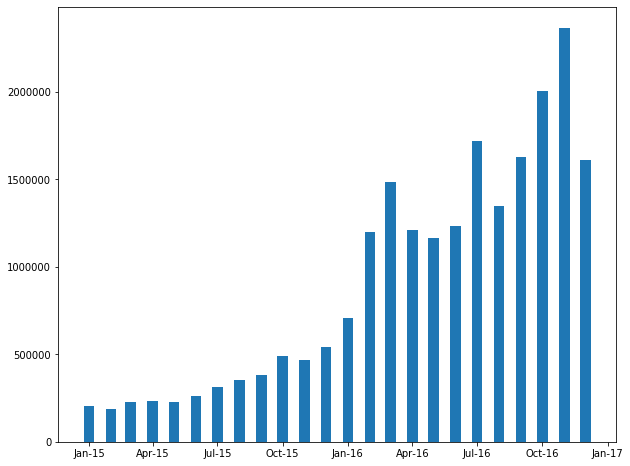

In [5]:
fig, ax = plt.subplots(figsize=(10,8))
ax.bar(months, [len(lst) for lst in users_by_month],width=15)
ax.xaxis.set_major_formatter(DateFormatter('%b-%y'))

plt.show()

In [6]:
partisan_data = pd.read_csv("../sample_data/politics_auth_partisan.csv", 
                            header=None, 
                            names = ['author', 'num_trump', 'num_sanders', 'num_clinton'],
                            index_col = False)

In [7]:
df_authors = partisan_data['author'].values
df_trump = partisan_data['num_trump'].values
df_sanders = partisan_data['num_sanders'].values
df_clinton = partisan_data['num_clinton'].values

num_sanders = {df_authors[i]:df_sanders[i] for i in range(len(df_authors))}
num_trump = {df_authors[i]:df_trump[i] for i in range(len(df_authors))}
num_clinton = {df_authors[i]:df_clinton[i] for i in range(len(df_authors))}

In [8]:
comment_threshold = 5

sanders_user_indices = []
trump_user_indices = []
clinton_user_indices = []
none_user_indices = []

for lst in users_by_month:
    sanders_user_indices.append([i for i in range(len(lst)) if num_sanders[lst[i]] >= comment_threshold
                                 and num_trump[lst[i]] == 0 and num_clinton[lst[i]] == 0])
    trump_user_indices.append([i for i in range(len(lst)) if num_trump[lst[i]] >= comment_threshold
                               and num_sanders[lst[i]] == 0 and num_clinton[lst[i]] == 0])
    clinton_user_indices.append([i for i in range(len(lst)) if num_clinton[lst[i]] >= comment_threshold
                               and num_sanders[lst[i]] == 0 and num_trump[lst[i]] == 0])
    none_user_indices.append([i for i in range(len(lst)) if num_sanders[lst[i]] == 0 
                              and num_trump[lst[i]]  == 0 and num_clinton[lst[i]] == 0])

In [9]:
comment_threshold = 1

sanders_user_indices1 = []
trump_user_indices1 = []
clinton_user_indices1 = []

for lst in users_by_month:
    sanders_user_indices1.append([i for i in range(len(lst)) if num_sanders[lst[i]] >= comment_threshold
                                 and num_trump[lst[i]] == 0 and num_clinton[lst[i]] == 0])
    trump_user_indices1.append([i for i in range(len(lst)) if num_trump[lst[i]] >= comment_threshold
                               and num_sanders[lst[i]] == 0 and num_clinton[lst[i]] == 0])
    clinton_user_indices1.append([i for i in range(len(lst)) if num_clinton[lst[i]] >= comment_threshold
                               and num_sanders[lst[i]] == 0 and num_trump[lst[i]] == 0])
    

In [71]:
comment_threshold = 10

sanders_user_indices10 = []
trump_user_indices10 = []
clinton_user_indices10 = []
none_user_indices10 = []

for lst in users_by_month:
    sanders_user_indices10.append([i for i in range(len(lst)) if num_sanders[lst[i]] >= comment_threshold
                                 and num_trump[lst[i]] == 0 and num_clinton[lst[i]] == 0])
    trump_user_indices10.append([i for i in range(len(lst)) if num_trump[lst[i]] >= comment_threshold
                               and num_sanders[lst[i]] == 0 and num_clinton[lst[i]] == 0])
    clinton_user_indices10.append([i for i in range(len(lst)) if num_clinton[lst[i]] >= comment_threshold
                               and num_sanders[lst[i]] == 0 and num_trump[lst[i]] == 0])
    none_user_indices10.append([i for i in range(len(lst)) if num_sanders[lst[i]] == 0 
                              and num_trump[lst[i]]  == 0 and num_clinton[lst[i]] == 0])

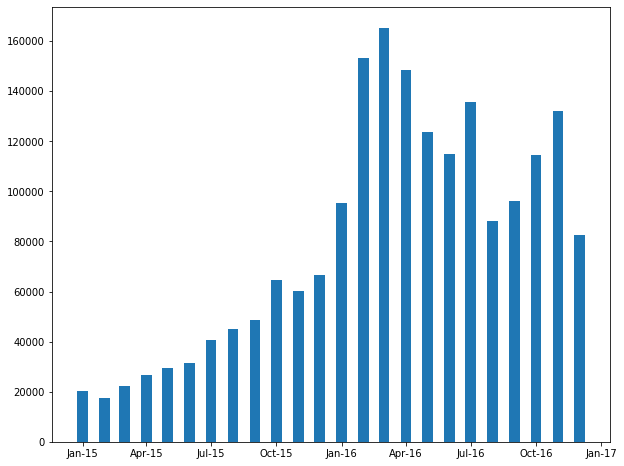

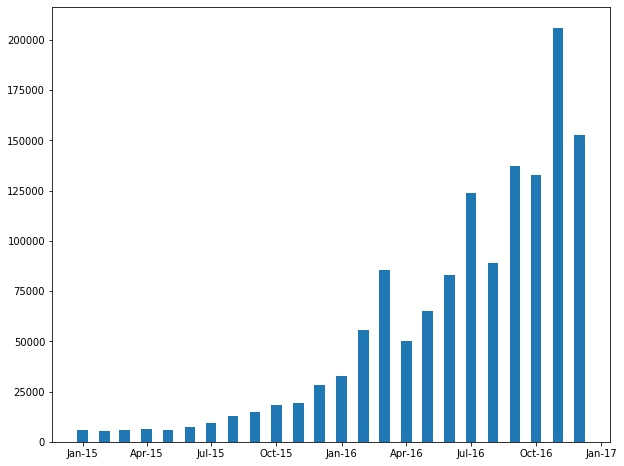

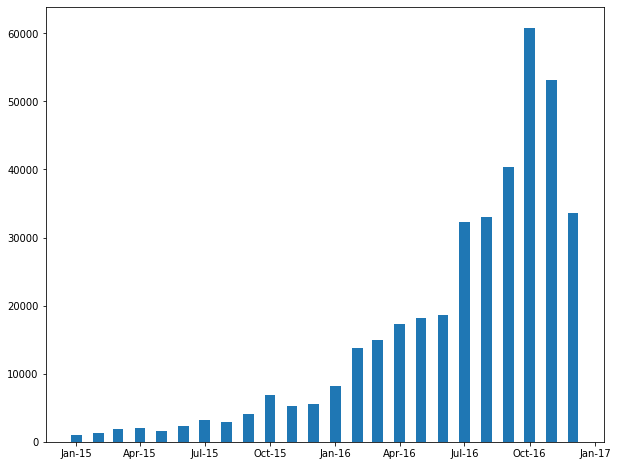

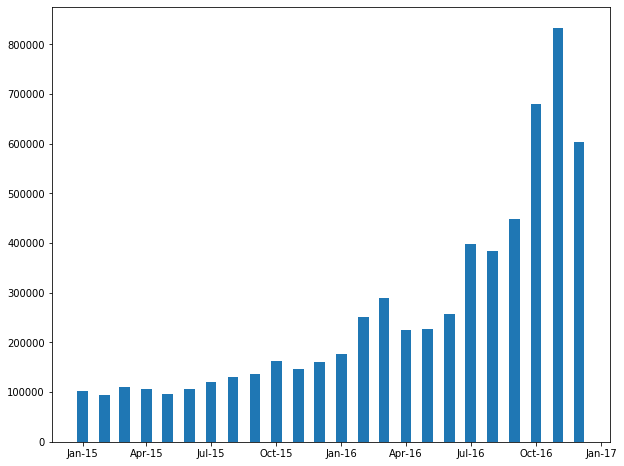

In [9]:
fig, ax = plt.subplots(figsize=(10,8))
ax.bar(months, [len(lst) for lst in sanders_user_indices],width=15)
ax.xaxis.set_major_formatter(DateFormatter('%b-%y'))

plt.show()

fig, ax = plt.subplots(figsize=(10,8))
ax.bar(months, [len(lst) for lst in trump_user_indices],width=15)
ax.xaxis.set_major_formatter(DateFormatter('%b-%y'))

plt.show()

fig, ax = plt.subplots(figsize=(10,8))
ax.bar(months, [len(lst) for lst in clinton_user_indices],width=15)
ax.xaxis.set_major_formatter(DateFormatter('%b-%y'))

plt.show()

fig, ax = plt.subplots(figsize=(10,8))
ax.bar(months, [len(lst) for lst in none_user_indices],width=15)
ax.xaxis.set_major_formatter(DateFormatter('%b-%y'))

plt.show()

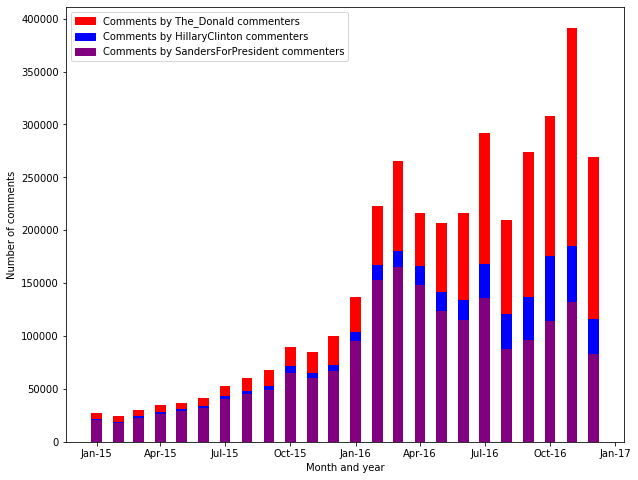

In [15]:
fig, ax = plt.subplots(figsize=(10,8))

ax.bar(months, [len(sanders_user_indices[i]) for i in range(24)], width = 15, color = 'purple')

ax.bar(months, [len(clinton_user_indices[i]) for i in range(24)], 
       bottom = [len(sanders_user_indices[i]) for i in range(24)],
       width = 15, color = 'blue')

ax.bar(months, [len(trump_user_indices[i]) for i in range(24)], 
       bottom = [len(sanders_user_indices[i]) + len(clinton_user_indices[i]) for i in range(24)], 
       width=15, color = 'red')

ax.xaxis.set_major_formatter(DateFormatter('%b-%y'))

red_patch = mpatches.Patch(color='red', label='Comments by The_Donald commenters')
blue_patch = mpatches.Patch(color='blue', label='Comments by HillaryClinton commenters')
purple_patch = mpatches.Patch(color='purple', label='Comments by SandersForPresident commenters')
plt.legend(handles=[red_patch, blue_patch, purple_patch])
plt.xlabel('Month and year')
plt.ylabel('Number of comments')

plt.show()

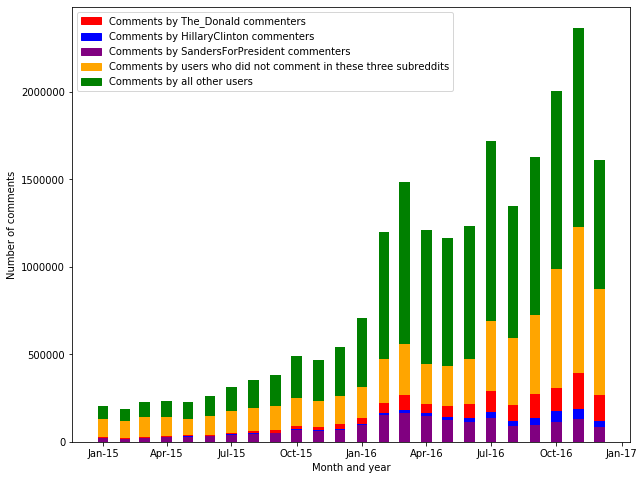

In [18]:
fig, ax = plt.subplots(figsize=(10,8))

ax.bar(months, [len(lst) for lst in users_by_month], width=15, color = 'green')

ax.bar(months, [len(sanders_user_indices[i]) for i in range(24)], width = 15, color = 'purple')

ax.bar(months, [len(clinton_user_indices[i]) for i in range(24)], 
       bottom = [len(sanders_user_indices[i]) for i in range(24)],
       width = 15, color = 'blue')

ax.bar(months, [len(trump_user_indices[i]) for i in range(24)], 
       bottom = [len(sanders_user_indices[i]) + len(clinton_user_indices[i]) for i in range(24)], 
       width=15, color = 'red')

ax.bar(months, [len(none_user_indices[i]) for i in range(24)], 
       bottom = [len(sanders_user_indices[i]) + len(clinton_user_indices[i]) + len(trump_user_indices[i]) for i in range(24)], 
       width=15, color = 'orange')


ax.xaxis.set_major_formatter(DateFormatter('%b-%y'))

red_patch = mpatches.Patch(color='red', label='Comments by The_Donald commenters')
blue_patch = mpatches.Patch(color='blue', label='Comments by HillaryClinton commenters')
purple_patch = mpatches.Patch(color='purple', label='Comments by SandersForPresident commenters')
orange_patch = mpatches.Patch(color='orange', label='Comments by users who did not comment in these three subreddits')
green_patch = mpatches.Patch(color='green', label='Comments by all other users')

plt.legend(handles=[red_patch, blue_patch, purple_patch, orange_patch, green_patch])
plt.xlabel('Month and year')
plt.ylabel('Number of comments')

plt.show()

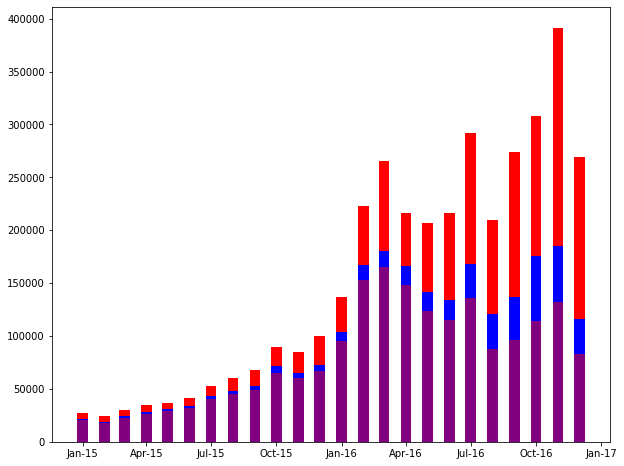

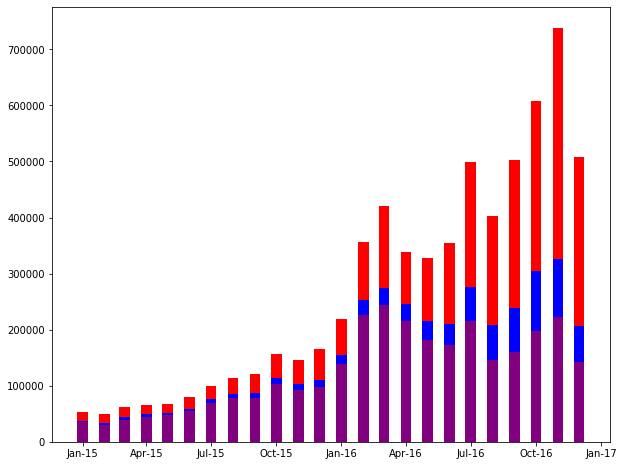

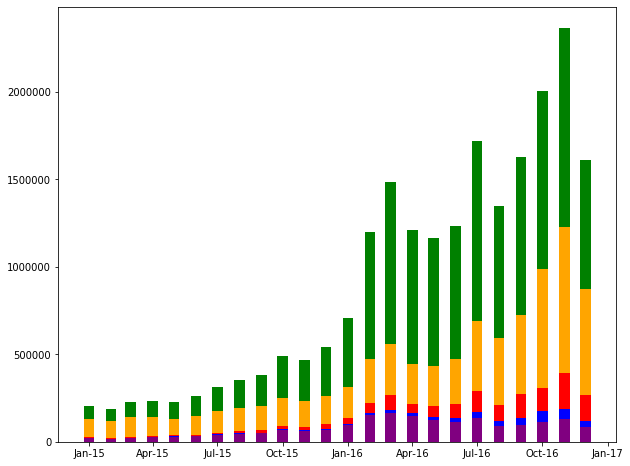

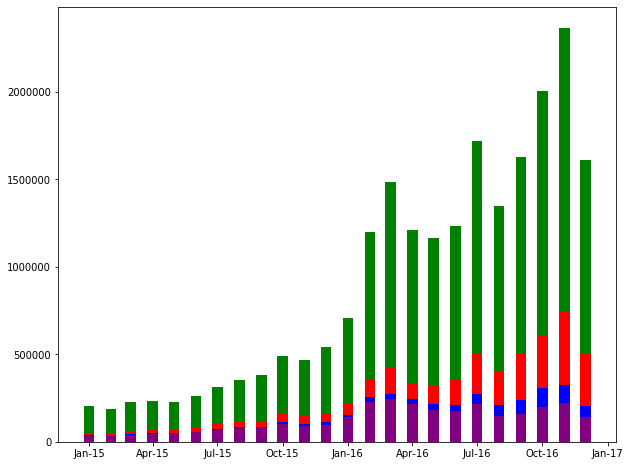

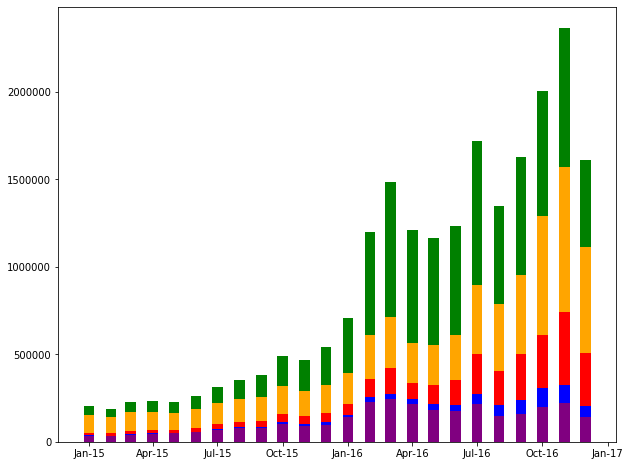

In [80]:
fig, ax = plt.subplots(figsize=(10,8))

ax.bar(months, [len(sanders_user_indices[i]) for i in range(24)], width = 15, color = 'purple')

ax.bar(months, [len(clinton_user_indices[i]) for i in range(24)], 
       bottom = [len(sanders_user_indices[i]) for i in range(24)],
       width = 15, color = 'blue')

ax.bar(months, [len(trump_user_indices[i]) for i in range(24)], 
       bottom = [len(sanders_user_indices[i]) + len(clinton_user_indices[i]) for i in range(24)], 
       width=15, color = 'red')

ax.xaxis.set_major_formatter(DateFormatter('%b-%y'))

plt.show()

fig, ax = plt.subplots(figsize=(10,8))

ax.bar(months, [len(sanders_user_indices1[i]) for i in range(24)], width = 15, color = 'purple')

ax.bar(months, [len(clinton_user_indices1[i]) for i in range(24)], 
       bottom = [len(sanders_user_indices1[i]) for i in range(24)],
       width = 15, color = 'blue')

ax.bar(months, [len(trump_user_indices1[i]) for i in range(24)], 
       bottom = [len(sanders_user_indices1[i]) + len(clinton_user_indices1[i]) for i in range(24)], 
       width=15, color = 'red')

ax.xaxis.set_major_formatter(DateFormatter('%b-%y'))

plt.show()

fig, ax = plt.subplots(figsize=(10,8))

ax.bar(months, [len(lst) for lst in users_by_month], width=15, color = 'green')

ax.bar(months, [len(sanders_user_indices[i]) for i in range(24)], width = 15, color = 'purple')

ax.bar(months, [len(clinton_user_indices[i]) for i in range(24)], 
       bottom = [len(sanders_user_indices[i]) for i in range(24)],
       width = 15, color = 'blue')

ax.bar(months, [len(trump_user_indices[i]) for i in range(24)], 
       bottom = [len(sanders_user_indices[i]) + len(clinton_user_indices[i]) for i in range(24)], 
       width=15, color = 'red')

ax.bar(months, [len(none_user_indices[i]) for i in range(24)], 
       bottom = [len(sanders_user_indices[i]) + len(clinton_user_indices[i]) + len(trump_user_indices[i]) for i in range(24)], 
       width=15, color = 'orange')

ax.xaxis.set_major_formatter(DateFormatter('%b-%y'))

plt.show()

fig, ax = plt.subplots(figsize=(10,8))

ax.bar(months, [len(lst) for lst in users_by_month], width=15, color = 'green')

ax.bar(months, [len(sanders_user_indices1[i]) for i in range(24)], width = 15, color = 'purple')

ax.bar(months, [len(clinton_user_indices1[i]) for i in range(24)], 
       bottom = [len(sanders_user_indices1[i]) for i in range(24)],
       width = 15, color = 'blue')

ax.bar(months, [len(trump_user_indices1[i]) for i in range(24)], 
       bottom = [len(sanders_user_indices1[i]) + len(clinton_user_indices1[i]) for i in range(24)], 
       width=15, color = 'red')

# ax.bar(months, [len(none_user_indices[i]) for i in range(24)], 
#        bottom = [len(sanders_user_indices1[i]) + len(clinton_user_indices1[i]) + len(trump_user_indices1[i]) for i in range(24)], 
#        width=15, color = 'orange')

ax.xaxis.set_major_formatter(DateFormatter('%b-%y'))

plt.show()

fig, ax = plt.subplots(figsize=(10,8))

ax.bar(months, [len(lst) for lst in users_by_month], width=15, color = 'green')

ax.bar(months, [len(sanders_user_indices1[i]) for i in range(24)], width = 15, color = 'purple')

ax.bar(months, [len(clinton_user_indices1[i]) for i in range(24)], 
       bottom = [len(sanders_user_indices1[i]) for i in range(24)],
       width = 15, color = 'blue')

ax.bar(months, [len(trump_user_indices1[i]) for i in range(24)], 
       bottom = [len(sanders_user_indices1[i]) + len(clinton_user_indices1[i]) for i in range(24)], 
       width=15, color = 'red')

ax.bar(months, [len(none_user_indices[i]) for i in range(24)], 
       bottom = [len(sanders_user_indices1[i]) + len(clinton_user_indices1[i]) + len(trump_user_indices1[i]) for i in range(24)], 
       width=15, color = 'orange')

ax.xaxis.set_major_formatter(DateFormatter('%b-%y'))

plt.show()


In [20]:
sanders_tf_by_month = []
trump_tf_by_month = []

In [11]:
# for i in range(24):
#     print(i)
    
#     curr_toks = []
    
#     with open("stored_variables/politics_tokens2_month" + str(i) + ".json", 'r') as f:
#         curr_toks = json.load(f)
    
#     sanders_bow = [politics_dictionary.doc2bow(curr_toks[j]) for j in sanders_user_indices[i]]
#     trump_bow = [politics_dictionary.doc2bow(curr_toks[j]) for j in sanders_user_indices[i]]
    
#     sanders_mat = lil_matrix((len(sanders_user_indices[i]), len(politics_dictionary.id2token.keys())))
    
#     for j in range(len(sanders_user_indices[i])):
#         curr_bow = politics_dictionary.doc2bow(curr_toks[sanders_user_indices[i][j]])
        
#         for term, freq in curr_bow:
#             sanders_mat[j,term] = freq
            
#     sanders_tf_by_month.append(csr_matrix(sanders_mat))
            
#     trump_mat = lil_matrix((len(trump_user_indices[i]), len(politics_dictionary.id2token.keys())))
    
#     for j in range(len(trump_user_indices[i])):
#         curr_bow = politics_dictionary.doc2bow(curr_toks[trump_user_indices[i][j]])
        
#         for term, freq in curr_bow:
#             trump_mat[j,term] = freq
            
#     trump_tf_by_month.append(csr_matrix(trump_mat))

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23


In [21]:
for i in range(24):
    print(i)
        
    with open("stored_variables/politics_sanders_tf" + str(i) + ".pickle", 'rb') as f:
        sanders_tf_by_month.append(pickle.load(f))
        
    with open("stored_variables/politics_trump_tf" + str(i) + ".pickle", 'rb') as f:
        trump_tf_by_month.append(pickle.load(f))


0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23


In [22]:
# from https://github.com/ddemszky/framing-twitter/blob/master/3_polarization_measures/calculate_polarization_simple.py
def get_party_q(party_counts, exclude_user_id = -1):
    user_sum = party_counts.sum(axis=0)
    if exclude_user_id > -1:
        user_sum -= party_counts[exclude_user_id, :]
    total_sum = user_sum.sum()
    return user_sum / total_sum

def get_rho(dem_q, rep_q):
    denom = dem_q + rep_q
    denom[denom == 0] = 1
    return (rep_q / (denom)).transpose()

def calculate_polarization(dem_counts, rep_counts, sample_size = 1000):
    dem_no = dem_counts.shape[0]
    rep_no = rep_counts.shape[0]
    
    if sample_size < dem_no:
        dem_indices = random.sample(range(dem_no), sample_size)
        dem_counts = dem_counts[dem_indices, :]
        dem_no = sample_size
        
    if sample_size < rep_no:
        rep_indices = random.sample(range(rep_no), sample_size)
        rep_counts = rep_counts[rep_indices, :]
        rep_no = sample_size
        
    
    dem_user_total = dem_counts.sum(axis=1)
    rep_user_total = rep_counts.sum(axis=1)
    
    # equivalent to dem_counts / dem_user_total
    dem_user_distr = (diags(1 / dem_user_total.A.ravel())).dot(dem_counts)  # get row-wise distributions
    rep_user_distr = (diags(1 / rep_user_total.A.ravel())).dot(rep_counts)
    assert (set(dem_user_total.nonzero()[0]) == set(range(dem_no)))  # make sure there are no zero rows
    assert (set(rep_user_total.nonzero()[0]) == set(range(rep_no)))  # make sure there are no zero rows

    dem_q = get_party_q(dem_counts)
    rep_q = get_party_q(rep_counts)

    # apply measures via leave-out
    dem_addup = 0
    rep_addup = 0
    
    for i in range(dem_no):
        dem_leaveout_q = get_party_q(dem_counts, i)
        token_scores_dem = 1. - get_rho(dem_leaveout_q, rep_q)
        dem_addup += dem_user_distr[i, :].dot(token_scores_dem)[0, 0]
    
    for i in range(rep_no):
        rep_leaveout_q = get_party_q(rep_counts, i)
        token_scores_rep = get_rho(dem_q, rep_leaveout_q)
        rep_addup += rep_user_distr[i, :].dot(token_scores_rep)[0, 0]
    rep_val = 1 / rep_no * rep_addup
    dem_val = 1 / dem_no * dem_addup
    return 1/2 * (dem_val + rep_val)


In [23]:
pi_vals = []
subsample_vals = []

In [24]:
for i in range(24):
    print(i)
    sanders_mat = sanders_tf_by_month[i][sanders_tf_by_month[i].sum(axis=1).nonzero()[0],:]
    trump_mat = trump_tf_by_month[i][trump_tf_by_month[i].sum(axis=1).nonzero()[0],:]
    
    pi_val_curr = calculate_polarization(sanders_mat, trump_mat, sample_size=10000)
    
    pi_vals.append(pi_val_curr)
    
    subsample = []
    
    for i in range(100):
        subsample.append(calculate_polarization(sanders_mat, trump_mat, sample_size=100))
    
    subsample_vals.append(subsample)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23


In [31]:
print(min([len(sanders_tf_by_month[i].sum(axis=1).nonzero()[0]) for i in range(24)]))
print(max([len(sanders_tf_by_month[i].sum(axis=1).nonzero()[0]) for i in range(24)]))
print(min([len(trump_tf_by_month[i].sum(axis=1).nonzero()[0]) for i in range(24)]))
print(max([len(trump_tf_by_month[i].sum(axis=1).nonzero()[0]) for i in range(24)]))

17370
163892
5170
204356


In [25]:
def pi_val_confidence_interval(lst, estimate, t_k = 50, t_full = 5000):
    assert(len(lst) == 100)
    
    pi_k_lst = sorted(lst)
    pi_avg = np.mean(pi_k_lst)
    q_k = [np.sqrt(t_k) * (pi_k - pi_avg) for pi_k in pi_k_lst]
    
    return (estimate - q_k[89] / np.sqrt(t_full), estimate - q_k[10] / np.sqrt(t_full))

In [26]:
pi_vals_ci_below = [pi_val_confidence_interval(subsample_vals[i], pi_vals[i], t_k=100, t_full=10000)[0] for i in range(len(pi_vals))]
pi_vals_ci_above = [pi_val_confidence_interval(subsample_vals[i], pi_vals[i], t_k=100, t_full=10000)[1] for i in range(len(pi_vals))]

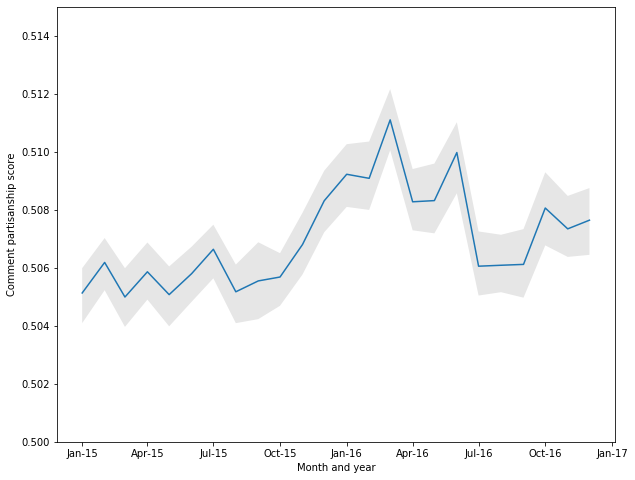

In [32]:
fig, ax = plt.subplots(figsize=(10,8))
ax.plot_date(months, pi_vals, linestyle = '-', marker=None)
ax.fill_between(months, pi_vals_ci_below, pi_vals_ci_above, facecolor='0.9', interpolate=True)
ax.xaxis.set_major_formatter(DateFormatter('%b-%y'))
plt.ylim((0.5, 0.515))
plt.xlabel('Month and year')
plt.ylabel('Comment partisanship score')

plt.show()

In [113]:
sanders_tf_by_month10 = []
trump_tf_by_month10 = []

In [114]:
for i in range(24):
    curr_sanders10 = set(sanders_user_indices10[i])
    sanders_indices = [j for j in range(len(sanders_user_indices[i])) 
                       if sanders_user_indices[i][j] in curr_sanders10]
    
    curr_trump10 = set(trump_user_indices10[i])
    trump_indices = [j for j in range(len(trump_user_indices[i])) 
                     if trump_user_indices[i][j] in curr_trump10]
    
    sanders_tf_by_month10.append(sanders_tf_by_month[i][sanders_indices, :])
    trump_tf_by_month10.append(trump_tf_by_month[i][trump_indices, :])
    

In [115]:
pi_vals10 = []
subsample_vals10 = []

In [117]:
for i in range(24):
    print(i)
    sanders_mat = sanders_tf_by_month10[i][sanders_tf_by_month10[i].sum(axis=1).nonzero()[0],:]
    trump_mat = trump_tf_by_month10[i][trump_tf_by_month10[i].sum(axis=1).nonzero()[0],:]
    
    pi_val_curr = calculate_polarization(sanders_mat, trump_mat, sample_size=5000)
    
    pi_vals10.append(pi_val_curr)
    
    subsample = []
    
    for i in range(100):
        subsample.append(calculate_polarization(sanders_mat, trump_mat, sample_size=50))
    
    subsample_vals10.append(subsample)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23


In [118]:
pi_vals_ci_below10 = [pi_val_confidence_interval(subsample_vals10[i], pi_vals10[i], t_k=50, t_full=5000)[0] for i in range(len(pi_vals10))]
pi_vals_ci_above10 = [pi_val_confidence_interval(subsample_vals10[i], pi_vals10[i], t_k=50, t_full=5000)[1] for i in range(len(pi_vals10))]


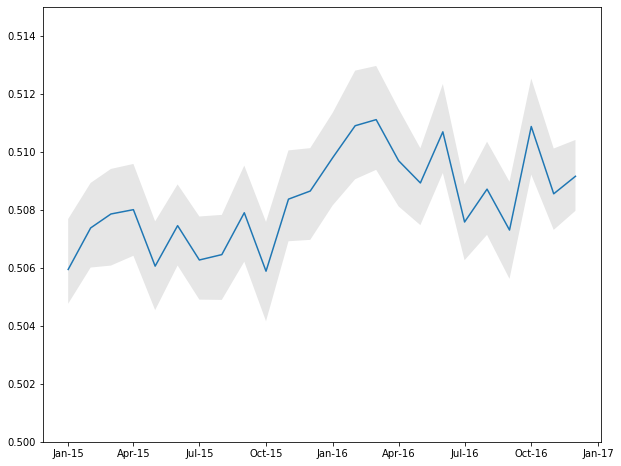

In [127]:
fig, ax = plt.subplots(figsize=(10,8))
ax.plot_date(months, pi_vals10, linestyle = '-', marker=None)
ax.fill_between(months, pi_vals_ci_below10, pi_vals_ci_above10, facecolor='0.9', interpolate=True)
ax.xaxis.set_major_formatter(DateFormatter('%b-%y'))
plt.ylim((0.5, 0.515))

plt.show()